In [ ]:

import os
import json

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

OUTPUT_DIR = "/Users/xujiaxuan/Desktop/si670finalproject-main/outputs"

RESULTS_PATH = os.path.join(OUTPUT_DIR, "evaluation_results.json")
ERRORS_ALL_PATH = os.path.join(OUTPUT_DIR, "errors_all.csv")

print("Results path exists:", os.path.exists(RESULTS_PATH))
print("Errors file exists:", os.path.exists(ERRORS_ALL_PATH))


Results path exists: True
Errors file exists: True


In [ ]:
with open(RESULTS_PATH, "r") as f:
    results = json.load(f)

errors_df = pd.read_csv(ERRORS_ALL_PATH)

print("Keys in results:", results.keys())
print("Regression metrics:", results["regression"].keys())
print("Ranking metrics:", results["ranking"].keys())

display(errors_df.head())


Keys in results: dict_keys(['regression', 'ranking', 'cv', 'meta'])
Regression metrics: dict_keys(['valid_rf', 'test_rf', 'valid_lr', 'test_lr'])
Ranking metrics: dict_keys(['RandomForest', 'LinearRegression', 'Baseline (relevance_score)'])


,question,y_true,rf_pred,lr_pred,baseline_score,rf_abs_error,lr_abs_error
0,i want leggings that have a 23-inch inseam and...,2.0,2.014356,1.750930,2,0.014356,0.249070
1,i want leggings that are fleece-lined and keep...,2.0,2.008291,1.999842,1,0.008291,0.000158
2,i want leggings that are fleece-lined and keep...,2.0,2.692873,2.360430,1,0.692873,0.360430
3,i want leggings that are plaid with a waist th...,3.0,2.399660,1.632827,4,0.600340,1.367173
4,i want leggings that are plaid and fit waist s...,1.0,1.661099,28.872584,1,0.661099,27.872584


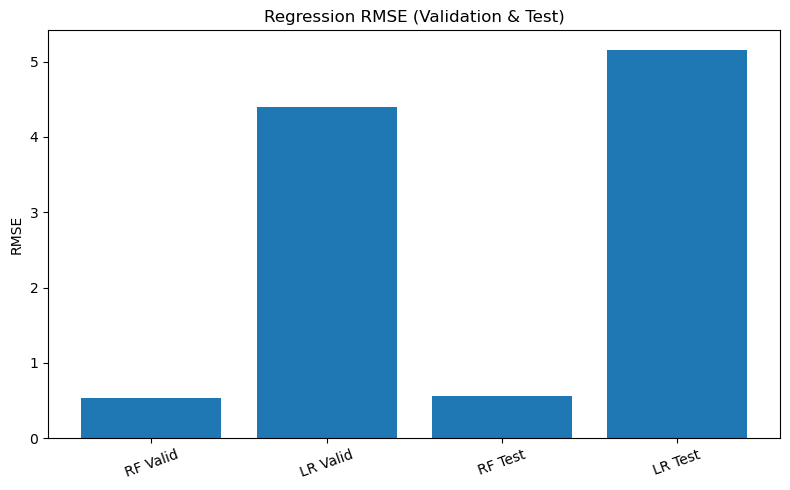

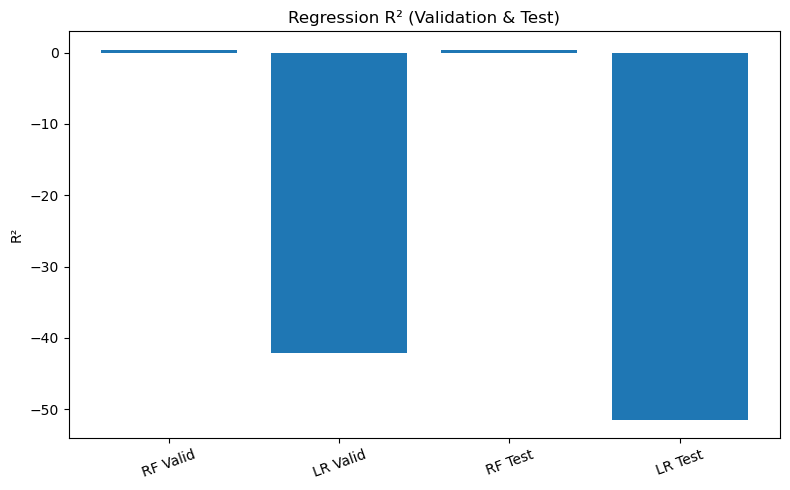

In [ ]:
#regression RMSE & R2 bar charts

reg = results["regression"]

labels = ["RF Valid", "LR Valid", "RF Test", "LR Test"]

rmse_vals = [
    reg["valid_rf"]["rmse"],
    reg["valid_lr"]["rmse"],
    reg["test_rf"]["rmse"],
    reg["test_lr"]["rmse"],
]

r2_vals = [
    reg["valid_rf"]["r2"],
    reg["valid_lr"]["r2"],
    reg["test_rf"]["r2"],
    reg["test_lr"]["r2"],
]

x = np.arange(len(labels))

#  RMSE plot 
plt.figure(figsize=(8, 5))
plt.bar(x, rmse_vals)
plt.xticks(x, labels, rotation=20)
plt.ylabel("RMSE")
plt.title("Regression RMSE (Validation & Test)")
plt.tight_layout()
plt.show()

#  R2 plot 
plt.figure(figsize=(8, 5))
plt.bar(x, r2_vals)
plt.xticks(x, labels, rotation=20)
plt.ylabel("R²")
plt.title("Regression R² (Validation & Test)")
plt.tight_layout()
plt.show()


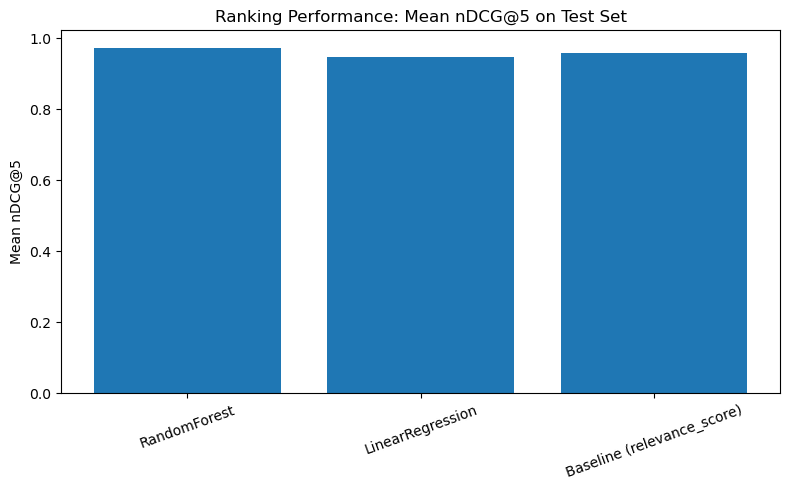

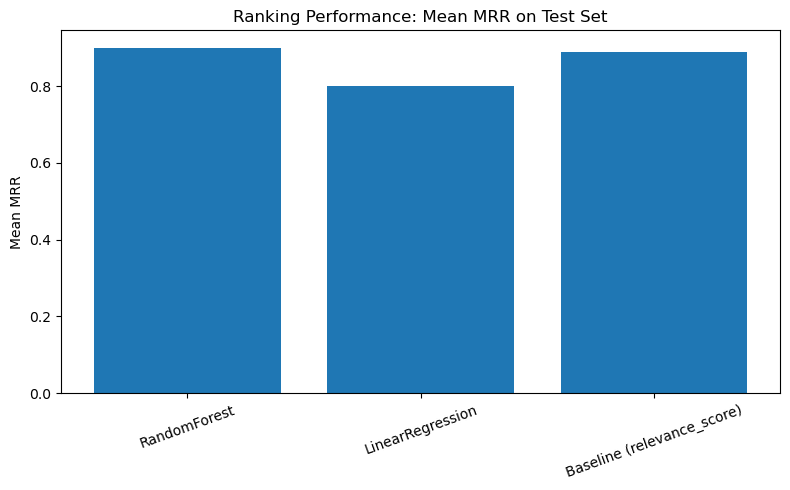

In [ ]:
# nDCG@5 and MRR

ranking = results["ranking"]

model_names = list(ranking.keys())  # e.g. ["RandomForest", "LinearRegression", "Baseline (relevance_score)"]
ndcg_vals = [ranking[m]["mean_ndcg@5"] for m in model_names]
mrr_vals = [ranking[m]["mean_mrr"] for m in model_names]

x = np.arange(len(model_names))

#  nDCG@5 plot 
plt.figure(figsize=(8, 5))
plt.bar(x, ndcg_vals)
plt.xticks(x, model_names, rotation=20)
plt.ylabel("Mean nDCG@5")
plt.title("Ranking Performance: Mean nDCG@5 on Test Set")
plt.tight_layout()
plt.show()

#  MRR plot 
plt.figure(figsize=(8, 5))
plt.bar(x, mrr_vals)
plt.xticks(x, model_names, rotation=20)
plt.ylabel("Mean MRR")
plt.title("Ranking Performance: Mean MRR on Test Set")
plt.tight_layout()
plt.show()


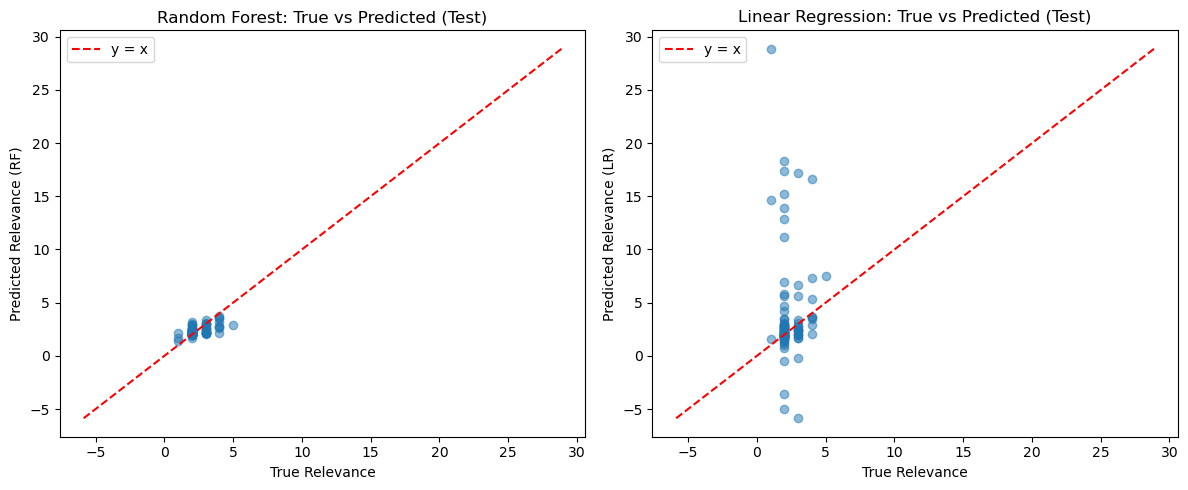

In [ ]:
# scatter plots (y_true vs y_pred) for RF and LR on test set

y_true = errors_df["y_true"].values
y_pred_rf = errors_df["rf_pred"].values
y_pred_lr = errors_df["lr_pred"].values

min_val = min(y_true.min(), y_pred_rf.min(), y_pred_lr.min())
max_val = max(y_true.max(), y_pred_rf.max(), y_pred_lr.max())
line = np.linspace(min_val, max_val, 100)

plt.figure(figsize=(12, 5))

#  RF scatter 
plt.subplot(1, 2, 1)
plt.scatter(y_true, y_pred_rf, alpha=0.5)
plt.plot(line, line, "r--", label="y = x")
plt.xlabel("True Relevance")
plt.ylabel("Predicted Relevance (RF)")
plt.title("Random Forest: True vs Predicted (Test)")
plt.legend()

#  LR scatter 
plt.subplot(1, 2, 2)
plt.scatter(y_true, y_pred_lr, alpha=0.5)
plt.plot(line, line, "r--", label="y = x")
plt.xlabel("True Relevance")
plt.ylabel("Predicted Relevance (LR)")
plt.title("Linear Regression: True vs Predicted (Test)")
plt.legend()

plt.tight_layout()
plt.show()


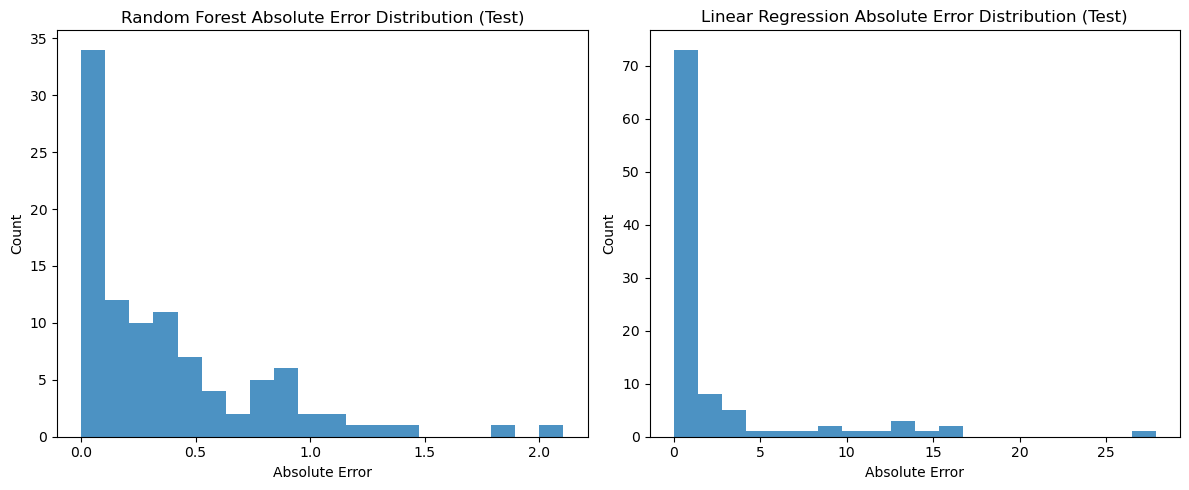

In [ ]:
# error histograms for RF and LR

if "rf_abs_error" not in errors_df.columns:
    errors_df["rf_abs_error"] = np.abs(errors_df["y_true"] - errors_df["rf_pred"])
if "lr_abs_error" not in errors_df.columns:
    errors_df["lr_abs_error"] = np.abs(errors_df["y_true"] - errors_df["lr_pred"])

rf_errors = errors_df["rf_abs_error"].values
lr_errors = errors_df["lr_abs_error"].values

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.hist(rf_errors, bins=20, alpha=0.8)
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.title("Random Forest Absolute Error Distribution (Test)")

plt.subplot(1, 2, 2)
plt.hist(lr_errors, bins=20, alpha=0.8)
plt.xlabel("Absolute Error")
plt.ylabel("Count")
plt.title("Linear Regression Absolute Error Distribution (Test)")

plt.tight_layout()
plt.show()
